In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import decorate

--2022-05-02 15:20:17--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-05-02 15:20:17--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.007s  

2022-05-02 15:20:18 (6.80 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



In [5]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):
  def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [7]:
sawtooth = SawtoothSignal().make_wave(duration=0.8, framerate=37000)
sawtooth.make_audio()

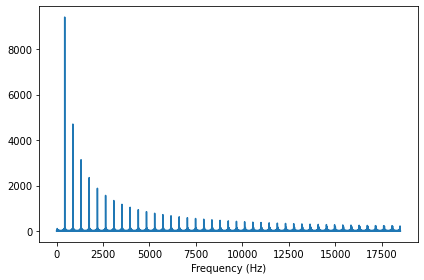

In [8]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

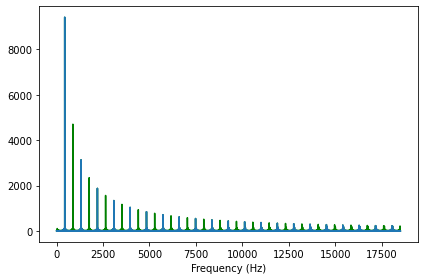

In [10]:
from thinkdsp import SquareSignal

sawtooth.make_spectrum().plot(color='green')
square = SquareSignal(amp=0.5).make_wave(duration=0.8, framerate=37000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

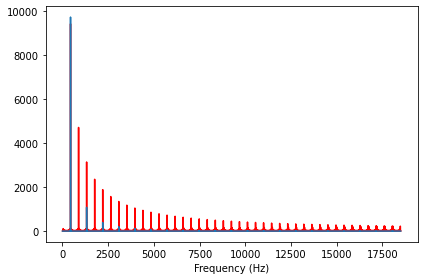

In [12]:
from thinkdsp import TriangleSignal

sawtooth.make_spectrum().plot(color='red')
triangle = TriangleSignal(amp=0.81).make_wave(duration=0.8, framerate=37000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Гармоники треугольной волны затухают пропорционально 1/f^2, а пилообразные затухают как 1/f

Упражнение 2 

In [18]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

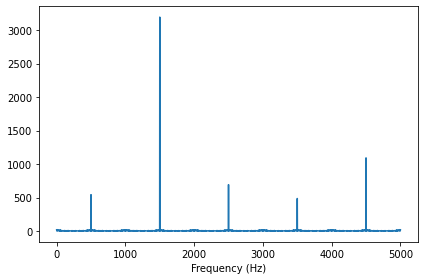

In [19]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Создали треугольный сигнал и посмотрели на его спектр

In [20]:
square.make_audio()

Сравним с 500hz

In [22]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

Упражнение 3

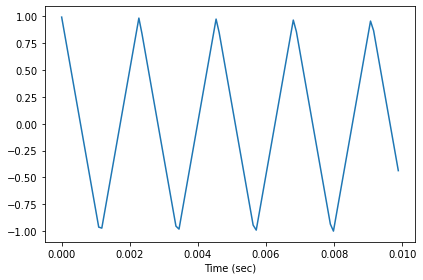

In [23]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (sec)')

In [24]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

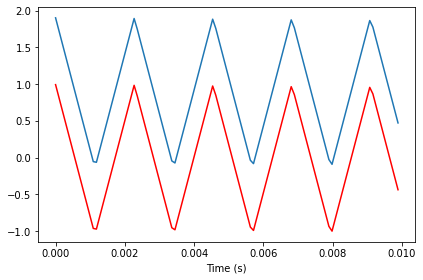

In [25]:
spectrum.hs[0] = 100
triangle.plot(color='red')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Компонент нулевой частоты представляет собой сумму всех значений в сигнале, если сигнал несмещен, компонент нулевой частоты равен 0

Упражнение 4

In [26]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [27]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

Масштабируем изображение

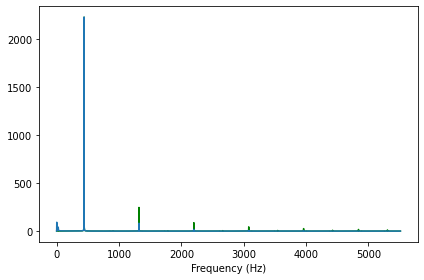

In [28]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='green')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Фильтр подавляет гармоники, поэтому он действует как фильтр нижних частот.

In [29]:
filtered = spectrum.make_wave()
filtered.make_audio()

Упраженение 5

In [30]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

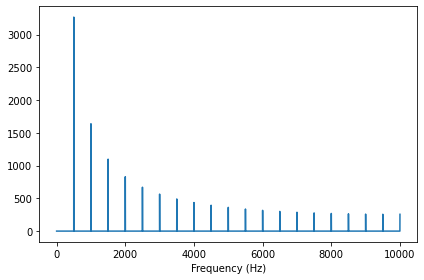

In [31]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')


Если мы применим фильтр, который мы написали в предыдущем упражнении, мы можем уменьшить гармоники

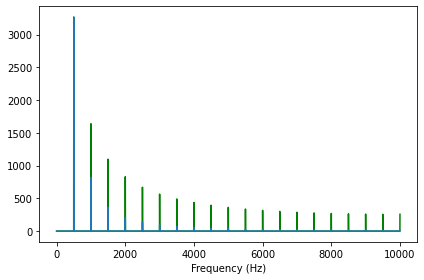

In [32]:
spectrum.plot(color='green')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [33]:
wave = spectrum.make_wave()
wave.make_audio()

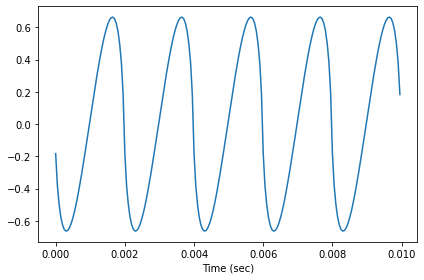

In [34]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (sec)')

Другой подход заключается в суммировании серии косинусоидальных сигналов с правильными частотами и амплитудами.

In [35]:
from thinkdsp import CosSignal

freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2

signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

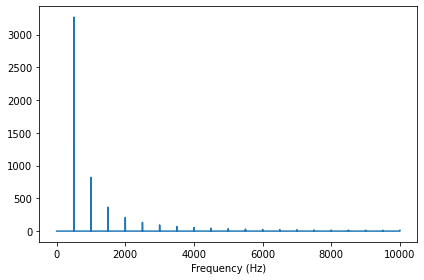

In [36]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [37]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

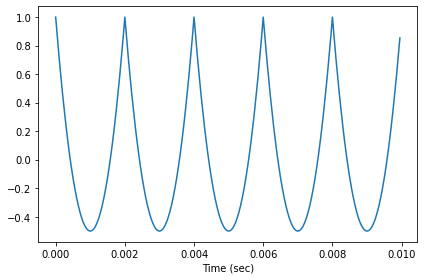

In [40]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (sec)')

Есть некая схожесть с пароболическими сигналами

In [42]:
from thinkdsp import ParabolicSignal

wave = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()

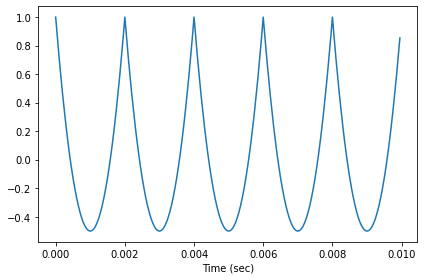

In [43]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (sec)')

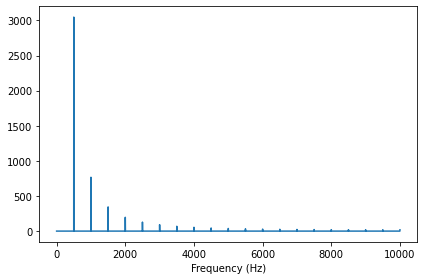

In [44]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')